In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

!git clone https://github.com/puneet-kr/TSS2022D27.git

fatal: destination path 'TSS2022D27' already exists and is not an empty directory.


In [15]:
import tensorflow as tf
import numpy as np
import datetime
from glob import glob
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [30]:
#---------[Change#1: Optional]-----------
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'TSS2022D27/Data/SportsCelebrity/Train'
valid_path = 'TSS2022D27/Data/SportsCelebrity/Test'

#---------[Change#2: Optional]-----------
#m = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
m = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in m.layers:
  layer.trainable = False

## [ToDo] 
Add/reduce more layers and observe the clusters

In [31]:
# useful for getting number of classes
folders = glob('TSS2022D27/Data/SportsCelebrity/Train/*')

# our layers - you can add more if you want
x = Flatten()(m.output)

# ------------------------------------------------------
# [ToDo] Add/reduce more layers and observe the clusters
# ------------------------------------------------------
# x = Dense(1000, activation='relu')(x)
x = Dense(2048, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=m.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [32]:
len(folders)

4

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')


Found 328 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [34]:
training_set[0][0].shape

(16, 224, 224, 3)

In [36]:
training_set[0][0][0]

array([[[0.27450982, 0.27058825, 0.18823531],
        [0.27450982, 0.27058825, 0.18823531],
        [0.27450982, 0.27058825, 0.18823531],
        ...,
        [0.22352943, 0.12941177, 0.1137255 ],
        [0.22352943, 0.12941177, 0.1137255 ],
        [0.22352943, 0.12941177, 0.1137255 ]],

       [[0.27450982, 0.27058825, 0.18823531],
        [0.27450982, 0.27058825, 0.18823531],
        [0.27450982, 0.27058825, 0.18823531],
        ...,
        [0.22352943, 0.12941177, 0.1137255 ],
        [0.22352943, 0.12941177, 0.1137255 ],
        [0.22352943, 0.12941177, 0.1137255 ]],

       [[0.27450982, 0.27058825, 0.18823531],
        [0.27450982, 0.27058825, 0.18823531],
        [0.27450982, 0.27058825, 0.18823531],
        ...,
        [0.22352943, 0.12941177, 0.1137255 ],
        [0.22352943, 0.12941177, 0.1137255 ],
        [0.22352943, 0.12941177, 0.1137255 ]],

       ...,

       [[0.5254902 , 0.5647059 , 0.3254902 ],
        [0.5254902 , 0.5647059 , 0.3254902 ],
        [0.5254902 , 0

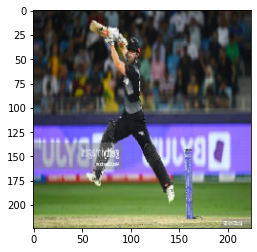

In [37]:
plt.imshow(training_set[0][0][0])

In [39]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size

In [40]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=STEP_SIZE_TRAIN,
  validation_steps=STEP_SIZE_VALID
)

Epoch 1/20
20/20 [==============================] - 7s 293ms/step - loss: 5.8661 - accuracy: 0.2436 - val_loss: 1.3868 - val_accuracy: 0.3125
Epoch 2/20
20/20 [==============================] - 6s 280ms/step - loss: 1.1928 - accuracy: 0.4808 - val_loss: 1.1356 - val_accuracy: 0.5446
Epoch 3/20
20/20 [==============================] - 6s 275ms/step - loss: 0.7417 - accuracy: 0.6987 - val_loss: 1.2405 - val_accuracy: 0.5179
Epoch 4/20
20/20 [==============================] - 6s 322ms/step - loss: 0.5599 - accuracy: 0.7724 - val_loss: 0.8256 - val_accuracy: 0.6875
Epoch 5/20
20/20 [==============================] - 6s 278ms/step - loss: 0.2451 - accuracy: 0.9199 - val_loss: 0.7360 - val_accuracy: 0.7232
Epoch 6/20
20/20 [==============================] - 6s 284ms/step - loss: 0.3201 - accuracy: 0.8782 - val_loss: 1.0215 - val_accuracy: 0.6339
Epoch 7/20
20/20 [==============================] - 6s 276ms/step - loss: 0.2379 - accuracy: 0.9103 - val_loss: 1.1464 - val_accuracy: 0.6607
Epoch 

In [41]:
y_train = training_set.labels

In [42]:
def plot_3d_cluster(layer_num = -1):
  import tensorflow as tf
  import keras.backend as K
  out_layer=model.layers[layer_num].output


  intermediate_layer_model = Model(inputs=model.input,
                                  outputs=out_layer)

  o = intermediate_layer_model.predict(training_set) #1st argument of the .fit() function

  pca=PCA(n_components=3)
  pca.fit(o)
  x_pca=pca.transform(o)
  X=x_pca[:,0]
  Y=x_pca[:,1]
  Z=x_pca[:,1]

  fig, (ax) = plt.subplots(1,1,figsize=(12,12))
  ax = plt.axes(projection='3d')
  plt.rcParams['axes.facecolor'] = 'white'


  colors = cm.rainbow(np.linspace(0, 1, len(folders)))

  for i in range(len(folders)):
    ax.scatter(X[y_train==i],Y[y_train==i],Z[y_train==i],s=100, color=colors[i])

  ax.set_xlabel('x axis',fontsize=20)
  ax.set_ylabel('y axis',fontsize=20)
  ax.set_zlabel('z axis',fontsize=20)

  lst = []

  for i in range(len(folders)):
    lst.append( mlines.Line2D([], [], linestyle='None', markersize=11, label='Class_'+str(i+1),color=colors[i]))

  plt.legend(lst)#,bbox_to_anchor=(0.5, 0.5, 0.45, 0.42))

  plt.rcParams["axes.labelsize"] = 22

  fig.text(0.5, 0, "Output Layer", ha='center',fontsize=18)

  # plt.savefig('Cluster.pdf',bbox_inches ="tight", pad_inches = 1, orientation ='landscape',dpi=1200,transparent=True)

  plt.show()

In [43]:
model.layers

In [44]:
# import tensorflow as tf
# import keras.backend as K
# out_layer=model.layers[-1].output
# output_fn= K.function([model.input],out_layer)
# o=output_fn([x_train]) #1st argument of the .fit() function
# o.shape

In [45]:
import tensorflow as tf
import keras.backend as K
out_layer=model.layers[-1].output


intermediate_layer_model = Model(inputs=model.input,
                                 outputs=out_layer)

o = intermediate_layer_model.predict(training_set) #1st argument of the .fit() function
o.shape

(328, 4)

In [46]:
o.shape

(328, 4)

In [47]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(o)
# o=scaler.transform(o)
# print(o.shape)

In [48]:
from sklearn.decomposition import PCA
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

pca=PCA(n_components=3)

In [49]:
pca.fit(o)

PCA(n_components=3)

In [ ]:
x_pca=pca.transform(o)
x_pca.shape

In [51]:
X=x_pca[:,0]
Y=x_pca[:,1]
Z=x_pca[:,1]

In [ ]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, (ax) = plt.subplots(1,1,figsize=(12,12))
ax = plt.axes(projection='3d')
plt.rcParams['axes.facecolor'] = 'white'


colors = cm.rainbow(np.linspace(0, 1, len(folders)))

for i in range(len(folders)):
  ax.scatter(X[y_train==i],Y[y_train==i],Z[y_train==i],s=100, color=colors[i])

# ax.scatter(X[y_train==1],Y[y_train==1],Z[y_train==1],marker='*',color='green',s=100)
# ax.scatter(X[y_train==3],Y[y_train==3],Z[y_train==3],marker='P',color='blue',s=100)
# ax.scatter(X[y_train==2],Y[y_train==2],Z[y_train==2],marker='^',color='darkorange',s=100)
# ax.scatter(X[y_train==0],Y[y_train==0],Z[y_train==0],marker='o',color='red',s=100)

ax.set_xlabel('x axis',fontsize=20)
ax.set_ylabel('y axis',fontsize=20)
ax.set_zlabel('z axis',fontsize=20)

lst = []

for i in range(len(folders)):
  lst.append( mlines.Line2D([], [], linestyle='None', markersize=11, label='Class_'+str(i+1),color=colors[i]))
#   ax.scatter(X[y_train==i+1],Y[y_train==i+1],Z[y_train==i+1],s=100)

# b = mlines.Line2D([], [], linestyle='None', markersize=11, label='Happy', marker='*',color='green')
# c = mlines.Line2D([], [], linestyle='None', markersize=10, label='Sad',   marker='P',color='blue')
# d = mlines.Line2D([], [], linestyle='None', markersize=10, label='Hate',  marker='^',color='darkorange')
# a = mlines.Line2D([], [], linestyle='None', markersize=10, label='Anger', marker='o',color='red')

plt.legend(lst)#,bbox_to_anchor=(0.5, 0.5, 0.45, 0.42))

plt.rcParams["axes.labelsize"] = 22

fig.text(0.5, 0, "Output Layer", ha='center',fontsize=18)

# plt.savefig('Cluster.pdf',bbox_inches ="tight", pad_inches = 1, orientation ='landscape',dpi=1200,transparent=True)

#plt.show()

## [ToDo] 
Cluster plot for fourth last layer.

In [ ]:
##

## [ToDo] 
Cluster plot for third last layer.

In [ ]:
## 

## [ToDo] 
Cluster plot for second last layer.

In [ ]:
##

## [ToDo] 
Cluster plot for last layer.

In [ ]:
##

**Full implementation of the Explainability Technique**:

Paper: https://www.isca-speech.org/archive/pdfs/interspeech_2021/kumar21d_interspeech.pdf 

Code: https://github.com/MIntelligence-Group/SpeechText_EmoRec
